# Gather

In [229]:
# The WeRateDogs Twitter archive

import pandas as pd
import requests
import tweepy
import json
from timeit import default_timer as timer
import matplotlib.pyplot as plt
import numpy as np
import re

df_archived = pd.read_csv('twitter_archive_enhanced.csv')

In [98]:
# The tweets image predctions

url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
with open('image_predictions.tsv', mode='wb') as file:
    file.write(response.content)
    file.close()
df_image = pd.read_csv('image_predictions.tsv', sep='\t')

In [99]:
# Tweets' JSON data from twitter API

consumer_key = 'LXHYTsJWSydgMJQYld0iFjdML'
consumer_secret = 'JTa39W5wzlCotNgoOltx12D0hZppkzWvF4pqObl6Rx9I7PSgem'
access_token = '883915268501643264-N2tCLPLFwsvedqBsihNL8Sd6wcXJiyB'
access_secret = 'aEb6K8bgi4xo8RYtHXTotiKqnJmb5khG4SZIP9m6oJ3E6'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

In [42]:
# Create the tweet_json.txt

start = timer()

with open('tweet_json.txt', mode='w') as file:
    for id in df_archived.tweet_id:
        try:
            tweet = api.get_status(id, tweet_mode = 'extended')
            json.dump(tweet._json, file)
            file.write('\n')
        except tweepy.TweepError as e:    
            None
        end = timer()
        print(id, end)
        
    file.close()

892420643555336193 7915.310332101
892177421306343426 7915.81618765
891815181378084864 7916.265971826
891689557279858688 7916.541085295
891327558926688256 7916.786582338
891087950875897856 7917.040518378
890971913173991426 7918.348237497
890729181411237888 7918.648066513
890609185150312448 7918.860194893
890240255349198849 7919.080392686
890006608113172480 7919.345274396
889880896479866881 7919.640922754
889665388333682689 7919.890429181
889638837579907072 7920.107558846
889531135344209921 7920.391802326
889278841981685760 7920.646188014
888917238123831296 7921.034655775
888804989199671297 7921.318156093
888554962724278272 7921.558541935
888202515573088257 7921.979498027
888078434458587136 7922.491375847
887705289381826560 7923.374685054
887517139158093824 7923.826393549
887473957103951883 7924.454848174
887343217045368832 7926.335291254
887101392804085760 7928.808470574
886983233522544640 7933.659475223
886736880519319552 7935.008718274
886680336477933568 7938.178383464
886366144734445

846153765933735936 8128.005137657
846139713627017216 8128.382506588
846042936437604353 8128.647449903
845812042753855489 8128.918939571
845677943972139009 8129.215676943
845459076796616705 8129.49585111
845397057150107648 8129.692429717
845306882940190720 8130.215761681
845098359547420673 8130.891677312
844979544864018432 8131.155449967
844973813909606400 8131.478353377
844704788403113984 8131.81915925
844580511645339650 8132.078414785
844223788422217728 8133.02318255
843981021012017153 8133.36904131
843856843873095681 8133.667345438
843604394117681152 8134.121339629
843235543001513987 8134.405350513
842892208864923648 8134.762535215
842846295480000512 8135.218618206
842765311967449089 8135.482717377
842535590457499648 8136.109888596
842163532590374912 8136.420438146
842115215311396866 8136.662589123
841833993020538882 8137.067553277
841680585030541313 8137.658896275
841439858740625411 8137.915239088
841320156043304961 8138.249155462
841314665196081154 8138.867994446
841077006473256960

814578408554463233 8246.957301122
814530161257443328 8247.283463325
814153002265309185 8247.685501197
813944609378369540 8248.096415948
813910438903693312 8249.025389953
813812741911748608 8249.516544728
813800681631023104 8250.041898404
813217897535406080 8250.501915853
813202720496779264 8250.978084099
813187593374461952 8251.391306919
813172488309972993 8251.903291742
813157409116065792 8252.42287657
813142292504645637 8252.636870554
813130366689148928 8253.159109554
813127251579564032 8253.540774258
813112105746448384 8253.99743622
813096984823349248 8254.575685318
813081950185472002 8255.402323969
813066809284972545 8255.802969263
813051746834595840 8256.112636996
812781120811126785 8256.340122706
812747805718642688 8256.705345872
812709060537683968 8257.003516809
812503143955202048 8257.23342479
812466873996607488 8257.658613601
812372279581671427 8257.914104915
811985624773361665 8258.196060157
811744202451197953 8258.44563202
811647686436880384 8258.877329757
811627233043480576

782305867769217024 8351.78174443
782021823840026624 8352.010978858
781955203444699136 8352.399232743
781661882474196992 8352.702194149
781655249211752448 8353.259243538
781524693396357120 8353.648107852
781308096455073793 8353.886866134
781251288990355457 8354.134341249
781163403222056960 8354.535550974
780931614150983680 8354.839815893
780858289093574656 8355.075435908
780800785462489090 8355.40598553
780601303617732608 8355.618041877
780543529827336192 8355.898407208
780496263422808064 8356.106968323
780476555013349377 8356.466041329
780459368902959104 8356.786424705
780192070812196864 8357.001374411
780092040432480260 8357.218665435
780074436359819264 8357.551284849
779834332596887552 8357.832091661
779377524342161408 8358.060145385
779124354206535695 8358.301020317
779123168116150273 8358.719366547
779056095788752897 8359.042787908
778990705243029504 8359.284037354
778774459159379968 8359.697249596
778764940568104960 8360.011723031
778748913645780993 8360.267275485
7786505430194831

Rate limit reached. Sleeping for: 400


758828659922702336 8415.070505524
758740312047005698 8820.279459519
758474966123810816 8820.510920375
758467244762497024 8820.764559141
758405701903519748 8820.993279756
758355060040593408 8821.685713397
758099635764359168 8822.39073305
758041019896193024 8822.75122491
757741869644341248 8823.073908211
757729163776290825 8823.317830825
757725642876129280 8823.613330776
757611664640446465 8824.136646721
757597904299253760 8824.544312622
757596066325864448 8824.818771018
757400162377592832 8825.841330464
757393109802180609 8826.311977099
757354760399941633 8827.034450018
756998049151549440 8827.577881558
756939218950160384 8828.623373638
756651752796094464 8829.177948164
756526248105566208 8829.738038495
756303284449767430 8830.324773171
756288534030475264 8830.744323943
756275833623502848 8831.409112004
755955933503782912 8831.773058473
755206590534418437 8832.264234004
755110668769038337 8832.713124014
754874841593970688 8833.240508569
754856583969079297 8833.809585264
7547470878462484

727644517743104000 8922.787381793
727524757080539137 8923.027117253
727314416056803329 8923.232570803
727286334147182592 8923.460070584
727175381690781696 8923.718165764
727155742655025152 8924.021577806
726935089318363137 8924.279278977
726887082820554753 8924.540786377
726828223124897792 8924.802987797
726224900189511680 8925.097117663
725842289046749185 8925.343430935
725786712245440512 8925.58794811
725729321944506368 8926.226989154
725458796924002305 8926.495889877
724983749226668032 8926.705391682
724771698126512129 8926.912856059
724405726123311104 8927.180511728
724049859469295616 8927.731563567
724046343203856385 8928.024053954
724004602748780546 8928.270416667
723912936180330496 8928.505526627
723688335806480385 8928.767737335
723673163800948736 8929.137308711
723179728551723008 8929.382191742
722974582966214656 8929.760344719
722613351520608256 8930.218410723
721503162398597120 8930.615768585
721001180231503872 8930.898384267
720785406564900865 8931.153212141
720775346191278

700847567345688576 9031.327025422
700796979434098688 9031.558001468
700747788515020802 9032.103444569
700518061187723268 9032.389329965
700505138482569216 9032.630371794
700462010979500032 9032.860120034
700167517596164096 9033.252082919
700151421916807169 9033.523575955
700143752053182464 9034.539618455
700062718104104960 9034.776864143
700029284593901568 9035.134822631
700002074055016451 9035.542506942
699801817392291840 9035.834690395
699788877217865730 9037.230022352
699779630832685056 9037.499366812
699775878809702401 9037.815027496
699691744225525762 9038.073513542
699446877801091073 9038.492039988
699434518667751424 9038.978097437
699423671849451520 9039.454796863
699413908797464576 9039.903889629
699370870310113280 9040.551831379
699323444782047232 9040.994584695
699088579889332224 9041.209897053
699079609774645248 9041.618839037
699072405256409088 9041.843774303
699060279947165696 9042.076797685
699036661657767936 9042.492195087
698989035503689728 9043.033490713
69895379795200

684830982659280897 9122.13611714
684800227459624960 9122.359323127
684594889858887680 9122.577852183
684588130326986752 9122.831361907
684567543613382656 9123.532374502
684538444857667585 9123.813506085
684481074559381504 9124.042261384
684460069371654144 9124.320316788
684241637099323392 9124.562727124
684225744407494656 9124.804149446
684222868335505415 9125.017482865
684200372118904832 9125.227064278
684195085588783105 9125.438343291
684188786104872960 9126.037071132
684177701129875456 9126.322851097
684147889187209216 9126.777785509
684122891630342144 9128.059109812
684097758874210310 9128.352302655
683857920510050305 9128.718399823
683852578183077888 9129.112623006
683849932751646720 9129.331808863
683834909291606017 9129.702502622
683828599284170753 9130.226592525
683773439333797890 9130.459568125
683742671509258241 9130.920680773
683515932363329536 9131.467035566
683498322573824003 9131.84490482
683481228088049664 9132.324777018
683462770029932544 9132.582149258
6834496954447994

Rate limit reached. Sleeping for: 524


676957860086095872 9725.223056207
676949632774234114 9725.560604884
676948236477857792 9725.969297966
676946864479084545 9726.389721441
676942428000112642 9726.776387026
676936541936185344 9727.19324966
676916996760600576 9727.40982751
676897532954456065 9727.662110891
676864501615042560 9728.075587602
676821958043033607 9728.430354135
676819651066732545 9728.879263537
676811746707918848 9729.568255519
676776431406465024 9730.172890126
676617503762681856 9730.731566293
676613908052996102 9731.235427962
676606785097199616 9731.670500498
676603393314578432 9732.181788935
676593408224403456 9732.548460188
676590572941893632 9733.151324462
676588346097852417 9733.607579298
676582956622721024 9734.231724772
676575501977128964 9734.895025759
676533798876651520 9735.732022539
676496375194980353 9736.267195734
676470639084101634 9736.614695438
676440007570247681 9736.92411731
676430933382295552 9737.272774928
676263575653122048 9737.665195904
676237365392908289 9737.916723312
67621968703905792

671536543010570240 9854.528489664
671533943490011136 9854.999562389
671528761649688577 9855.307802885
671520732782923777 9855.55933909
671518598289059840 9855.937222658
671511350426865664 9856.283827145
671504605491109889 9856.60497114
671497587707535361 9856.821744548
671488513339211776 9857.06680963
671486386088865792 9857.332864925
671485057807351808 9857.650858561
671390180817915904 9858.191651277
671362598324076544 9858.54259945
671357843010908160 9858.870937624
671355857343524864 9859.273798347
671347597085433856 9859.60565987
671186162933985280 9859.943383371
671182547775299584 9860.480297684
671166507850801152 9861.361454885
671163268581498880 9861.867344625
671159727754231808 9862.572315219
671154572044468225 9863.179166467
671151324042559489 9863.84866607
671147085991960577 9864.642689077
671141549288370177 9865.594811393
671138694582165504 9866.4962618
671134062904504320 9867.734477877
671122204919246848 9869.231012039
671115716440031232 9870.89373729
671109016219725825 9871

667188689915760640 9981.556321901
667182792070062081 9982.112733603
667177989038297088 9982.490652563
667176164155375616 9982.768636172
667174963120574464 9983.648248794
667171260800061440 9984.259468746
667165590075940865 9984.769838338
667160273090932737 9985.461525741
667152164079423490 9985.832540627
667138269671505920 9986.350733223
667119796878725120 9986.730520368
667090893657276420 9987.403503752
667073648344346624 9987.782219997
667070482143944705 9988.009183644
667065535570550784 9988.386915389
667062181243039745 9988.686157342
667044094246576128 9988.960223784
667012601033924608 9989.404743056
666996132027977728 9989.769380503
666983947667116034 9990.769369202
666837028449972224 9991.335053434
666835007768551424 9991.5664885
666826780179869698 9991.888025387
666817836334096384 9992.11466076
666804364988780544 9992.503641209
666786068205871104 9992.846054087
666781792255496192 9993.122961772
666776908487630848 9993.523934081
666739327293083650 9993.857171629
66670116822833152

In [100]:
# A sample look of data in dictionary 
data_dict.get('retweet_count'), data_dict.get('favorite_count'), data_dict.get('retweeted'), data_dict.get('id')

(483, 2485, False, 666020888022790149)

In [101]:
sum_dict = {
        "id" : [],
        "retweet_count" : [],
        "favorite_count" : [],
        "retweeted" : [],
}

In [102]:
with open ('tweet_json.txt') as json_file:
    line = json_file.readline()
    data_dict = json.loads(line)
    while line != '':
        sum_dict['id'].append(data_dict['id'])
        sum_dict['retweet_count'].append(data_dict['retweet_count'])
        sum_dict['favorite_count'].append(data_dict['favorite_count'])
        sum_dict['retweeted'].append(data_dict['retweeted'])
        line = json_file.readline()
        if line !='':
            data_dict = json.loads(line)
    json_file.close()

In [103]:
df = pd.DataFrame(sum_dict)

# Access

## Visually assessing data

In [104]:
df

,id,retweet_count,favorite_count,retweeted
0,892420643555336193,8000,37312,False
1,892177421306343426,5935,32078,False
2,891815181378084864,3924,24175,False
3,891689557279858688,8158,40619,False
4,891327558926688256,8832,38864,False
5,891087950875897856,2939,19524,False
6,890971913173991426,1947,11400,False
7,890729181411237888,17821,62918,False
8,890609185150312448,4041,26860,False
9,890240255349198849,6961,30776,False


In [105]:
df_archived

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950875897856/photo/1,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Jax. He enjoys ice cream so much he gets nervous around it. 13/10 help Jax enjoy more things by clicking below\n\nhttps://t.co/Zr4hWfAs1H https://t.co/tVJBRMnhxl,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,https://twitter.com/dog_rates/status/890971913173991426/photo/1",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10 https://t.co/v0nONBcwxq,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/890729181411237888/photo/1,https://twitter.com/dog_rates/status/890729181411237888/photo/1",13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Zoey. She doesn't want to be one of the scary sharks. Just wants to be a snuggly pettable boatpet. 13/10 #BarkWeek https://t.co/9TwLuAGH0b,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185150312448/photo/1,13,10,Zoey,None,None,None,None
9,89024025534

In [106]:
df_image

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


## Visually assessing data

### quality and tidiness issues found:
   - Quality issue 1(Q1) All values in the 'retweeted' column of the `df` table are false, the column can be dropped. 
   - Q2 In the `df_archived` table, the values of the 'rating denominator' column seem to always be 10, check those rows that the denominaotr is not 10, and see if they are correct; In addition, taking `row 46` as an exmaple, many decimal raings are not extracted correctly.
   - Q3 In the `df_archived` table, the 'retweeted_status_user_id' , 'retweeted_status_timestamp', 'in_reply_to_user_id' and the 'expanded_urls '  columns can be represented with the other remaining columns, so therefore, which all can be dropped.
   - Q4 In the `df_image` table, columns 'jpg_url', 'img_num', are redundant of the rssult of iamge predictions, as only image predictions are necessary for this analysis, hence the two columns may be dropped. 
   - Q5 In the `df_archived` table, the name column has many invalid values like , a, an, the.
   - Q6 In all three tables, The tweet_id column should be named same as well as their datatypes.
   - Tidiness issue 1(T1) In the `df_archived` table, the last 4 columns about 'dog stage' can be merged into one column, as it is one single result about 'dog stage'.

## Programacitally assessing data

In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2332 entries, 0 to 2331
Data columns (total 4 columns):
id                2332 non-null int64
retweet_count     2332 non-null int64
favorite_count    2332 non-null int64
retweeted         2332 non-null bool
dtypes: bool(1), int64(3)
memory usage: 57.0 KB


In [108]:
df_archived.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [109]:
df_image.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [110]:
df_image.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [111]:
df_archived.duplicated().sum()

0

In [112]:
df.duplicated().sum()

0

In [113]:
df_image.duplicated().sum()

0

## Programatically assessing data

### quality and tidiness issues found:
   - Q7 In the `df_archived` table, some of the tweets are retweets, which may be dropped, because they actually add no new data to the analysis.
   - Q8 In the `df_archived` table, the datatype of different columns should the reflective of the values present, like date, ratings, etc.
   - T2 In the `df_image` table, the columns from 'p1' all the way to 'p3_dog', can be integrated into one column, with  conditions such as only keep those predictions which predicted as dog, and those confidence higher than a certain percentage.
   - T3 The three table can be merged to one, based on the common 'tweet_id' column.

# Clean

In [114]:
# Make copites of the three tables
df_clean = df.copy()
df_archived_clean = df_archived.copy()
df_image_clean = df_image.copy()

#quality issue 1
#define: drop the 'retweeted' column in the `df` table

In [115]:
#code
df_clean.drop(axis=1, columns='retweeted', inplace=True)

In [116]:
#test
df_clean.head()

,id,retweet_count,favorite_count
0,892420643555336193,8000,37312
1,892177421306343426,5935,32078
2,891815181378084864,3924,24175
3,891689557279858688,8158,40619
4,891327558926688256,8832,38864


#quality issue 2
#define: fix those rows where the 'rating_denominator' column's value is not 10, in the `df_archived` table, 
if possible, also fix the 'rating_numerator' column, drop the 'rating_denominator' column after cleaning. In addition, many decimal ratings should also be fixed.

In [117]:
#code
df_archived_clean.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [118]:
df_archived_clean.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [119]:
    #consider these rows
lst = df_archived_clean.query('rating_denominator != 10').index
lst = list(lst)

In [120]:
    # ask pandas to display the full text
pd.options.display.max_colwidth = 1000

In [121]:
len(lst)

23

In [122]:
    # 1 
df_archived_clean.loc[lst[0], ['text']]

text    @jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho
Name: 313, dtype: object

In [123]:
    # rating should be 13/10
df_archived_clean.loc[lst[0], ['rating_denominator']] = 10
df_archived_clean.loc[lst[0], ['rating_numerator']] = 13

In [124]:
    #2
df_archived_clean.loc[lst[1], ['text']]

text    @docmisterio account started on 11/15/15
Name: 342, dtype: object

In [125]:
    # no rate is given, the rate can be set to 12/10, since this is the mode number of rate
df_archived_clean.loc[lst[1], ['rating_denominator']] = 10
df_archived_clean.loc[lst[1], ['rating_numerator']] = 12

In [126]:
    #3
df_archived_clean.loc[lst[2], ['text']]

text    The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd
Name: 433, dtype: object

In [127]:
    # set to 12/10 as the original rate was not valid
df_archived_clean.loc[lst[2], ['rating_denominator']] = 10
df_archived_clean.loc[lst[2], ['rating_numerator']] = 12

In [128]:
    #4
df_archived_clean.loc[lst[3], ['text']]

text    Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx
Name: 516, dtype: object

In [129]:
    # no rate is given, the rate can be set to 12/10, since this is the mode number of rate
df_archived_clean.loc[lst[3], ['rating_denominator']] = 10
df_archived_clean.loc[lst[3], ['rating_numerator']] = 12

In [130]:
    #5
df_archived_clean.loc[lst[4], ['text']]

text    RT @dog_rates: After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https:/…
Name: 784, dtype: object

In [131]:
df_archived_clean.loc[lst[4], ['rating_denominator']] = 10
df_archived_clean.loc[lst[4], ['rating_numerator']] = 14

In [132]:
    #6
df_archived_clean.loc[lst[5], ['text']]

text    Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE
Name: 902, dtype: object

In [133]:
# set to 12/10 as the original rate was not valid
df_archived_clean.loc[lst[5], ['rating_denominator']] = 10
df_archived_clean.loc[lst[5], ['rating_numerator']] = 12

In [134]:
    #7
df_archived_clean.loc[lst[6], ['text']]

text    After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ
Name: 1068, dtype: object

In [135]:
df_archived_clean.loc[lst[6], ['rating_denominator']] = 10
df_archived_clean.loc[lst[6], ['rating_numerator']] = 14

In [136]:
    #8
df_archived_clean.loc[lst[7], ['text']]

text    Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv
Name: 1120, dtype: object

In [137]:
    # set to 12/10 as the original rate was not valid
df_archived_clean.loc[lst[7], ['rating_denominator']] = 10
df_archived_clean.loc[lst[7], ['rating_numerator']] = 12

In [138]:
    #9
df_archived_clean.loc[lst[8], ['text']]

text    Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a
Name: 1165, dtype: object

In [139]:
df_archived_clean.loc[lst[8], ['rating_denominator']] = 10
df_archived_clean.loc[lst[8], ['rating_numerator']] = 13

In [140]:
    #10
df_archived_clean.loc[lst[9], ['text']]

text    This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq
Name: 1202, dtype: object

In [141]:
df_archived_clean.loc[lst[9], ['rating_denominator']] = 10
df_archived_clean.loc[lst[9], ['rating_numerator']] = 11

In [142]:
    #11
df_archived_clean.loc[lst[10], ['text']]

text    Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1
Name: 1228, dtype: object

In [143]:
# set to 12/10 as the original rate was not valid
df_archived_clean.loc[lst[10], ['rating_denominator']] = 10
df_archived_clean.loc[lst[10], ['rating_numerator']] = 12

In [144]:
    #12
df_archived_clean.loc[lst[11], ['text']]

text    Here's a brigade of puppers. All look very prepared for whatever happens next. 80/80 https://t.co/0eb7R1Om12
Name: 1254, dtype: object

In [145]:
    # set to 12/10 as the original rate was not valid
df_archived_clean.loc[lst[11], ['rating_denominator']] = 10
df_archived_clean.loc[lst[11], ['rating_numerator']] = 12

In [146]:
    #13
df_archived_clean.loc[lst[12], ['text']]

text    From left to right:\nCletus, Jerome, Alejandro, Burp, &amp; Titson\nNone know where camera is. 45/50 would hug all at once https://t.co/sedre1ivTK
Name: 1274, dtype: object

In [147]:
    # set to 12/10 as the original rate was not valid
df_archived_clean.loc[lst[12], ['rating_denominator']] = 10
df_archived_clean.loc[lst[12], ['rating_numerator']] = 12

In [148]:
    #14
df_archived_clean.loc[lst[13], ['text']]

text    Here is a whole flock of puppers.  60/50 I'll take the lot https://t.co/9dpcw6MdWa
Name: 1351, dtype: object

In [149]:
# set to 12/10 as the original rate was not valid
df_archived_clean.loc[lst[13], ['rating_denominator']] = 10
df_archived_clean.loc[lst[13], ['rating_numerator']] = 12

In [150]:
    #15
df_archived_clean.loc[lst[14], ['text']]

text    Happy Wednesday here's a bucket of pups. 44/40 would pet all at once https://t.co/HppvrYuamZ
Name: 1433, dtype: object

In [151]:
    # set to 12/10 as the original rate was not valid
df_archived_clean.loc[lst[14], ['rating_denominator']] = 10
df_archived_clean.loc[lst[14], ['rating_numerator']] = 12

In [152]:
    #16
df_archived_clean.loc[lst[15], ['text']]

text    Yes I do realize a rating of 4/20 would've been fitting. However, it would be unjust to give these cooperative pups that low of a rating
Name: 1598, dtype: object

In [153]:
    # set to 12/10 as the original rate was not valid
df_archived_clean.loc[lst[15], ['rating_denominator']] = 10
df_archived_clean.loc[lst[15], ['rating_numerator']] = 12

In [154]:
    #17
df_archived_clean.loc[lst[16], ['text']]

text    Two sneaky puppers were not initially seen, moving the rating to 143/130. Please forgive us. Thank you https://t.co/kRK51Y5ac3
Name: 1634, dtype: object

In [155]:
    # set to 12/10 as the original rate was not valid
df_archived_clean.loc[lst[16], ['rating_denominator']] = 10
df_archived_clean.loc[lst[16], ['rating_numerator']] = 12

In [156]:
    #18
df_archived_clean.loc[lst[17], ['text']]

text    Someone help the girl is being mugged. Several are distracting her while two steal her shoes. Clever puppers 121/110 https://t.co/1zfnTJLt55
Name: 1635, dtype: object

In [157]:
    # set to 12/10 as the original rate was not valid
df_archived_clean.loc[lst[17], ['rating_denominator']] = 10
df_archived_clean.loc[lst[17], ['rating_numerator']] = 12

In [158]:
    #19
df_archived_clean.loc[lst[18], ['text']]

text    This is Darrel. He just robbed a 7/11 and is in a high speed police chase. Was just spotted by the helicopter 10/10 https://t.co/7EsP8LmSp5
Name: 1662, dtype: object

In [159]:
df_archived_clean.loc[lst[18], ['rating_denominator']] = 10
df_archived_clean.loc[lst[18], ['rating_numerator']] = 10

In [160]:
    #20
df_archived_clean.loc[lst[19], ['text']]

text    I'm aware that I could've said 20/16, but here at WeRateDogs we are very professional. An inconsistent rating scale is simply irresponsible
Name: 1663, dtype: object

In [161]:
    # set to 12/10 as the original rate was not valid
df_archived_clean.loc[lst[19], ['rating_denominator']] = 10
df_archived_clean.loc[lst[19], ['rating_numerator']] = 12

In [162]:
    #21
df_archived_clean.loc[lst[20], ['text']]

text    IT'S PUPPERGEDDON. Total of 144/120 ...I think https://t.co/ZanVtAtvIq
Name: 1779, dtype: object

In [163]:
    # set to 12/10 as the original rate was not valid
df_archived_clean.loc[lst[20], ['rating_denominator']] = 10
df_archived_clean.loc[lst[20], ['rating_numerator']] = 12

In [164]:
    #22
df_archived_clean.loc[lst[21], ['text']]

text    Here we have an entire platoon of puppers. Total score: 88/80 would pet all at once https://t.co/y93p6FLvVw
Name: 1843, dtype: object

In [165]:
# set to 12/10 as the original rate was not valid
df_archived_clean.loc[lst[21], ['rating_denominator']] = 10
df_archived_clean.loc[lst[21], ['rating_numerator']] = 12

In [166]:
    #23
df_archived_clean.loc[lst[22], ['text']]

text    This is an Albanian 3 1/2 legged  Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10 https://t.co/d9NcXFKwLv
Name: 2335, dtype: object

In [167]:
df_archived_clean.loc[lst[22], ['rating_denominator']] = 10
df_archived_clean.loc[lst[22], ['rating_numerator']] = 9

In [168]:
    # to clean decimal ratings: get the indices of all ratings that contain a decimal number by using regression.
lst = list(df_archived_clean[df_archived_clean.text.str.contains(r"(\d+\.\d*\/\d+)")][['text', 'rating_numerator']].index)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  


In [169]:
len(lst)

6

In [170]:
    #1
df_archived_clean.loc[lst[0], ['text']]

text    This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948
Name: 45, dtype: object

In [171]:
df_archived_clean.loc[lst[0], ['rating_numerator']] = 13.5

In [172]:
    #2
df_archived_clean.loc[lst[1], ['text']]

text    RT @dog_rates: This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wu…
Name: 340, dtype: object

In [173]:
df_archived_clean.loc[lst[1], ['rating_numerator']] = 9.75

In [174]:
    #3
df_archived_clean.loc[lst[2], ['text']]

text    This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS
Name: 695, dtype: object

In [175]:
df_archived_clean.loc[lst[2], ['rating_numerator']] = 9.75

In [176]:
    #4
df_archived_clean.loc[lst[3], ['text']]

text    This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq
Name: 763, dtype: object

In [177]:
df_archived_clean.loc[lst[3], ['rating_numerator']] = 11.27

In [178]:
    #5
df_archived_clean.loc[lst[4], ['text']]

text    I've been told there's a slight possibility he's checking his mirror. We'll bump to 9.5/10. Still a menace
Name: 1689, dtype: object

In [179]:
df_archived_clean.loc[lst[4], ['rating_numerator']] = 9.5

In [180]:
    #6
df_archived_clean.loc[lst[5], ['text']]

text    Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD
Name: 1712, dtype: object

In [181]:
df_archived_clean.loc[lst[5], ['rating_numerator']] = 11.26

In [182]:
#test
df_archived_clean.rating_denominator.value_counts()
    # all denominators are 10 now.

10    2356
Name: rating_denominator, dtype: int64

In [195]:
df_archived_clean[df_archived_clean.text.str.contains(r"(\d+\.\d*\/\d+)")][['text', 'rating_numerator']]
    # all decimal ratings have benn fixed now.

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  """Entry point for launching an IPython kernel.


,text,rating_numerator
45,"This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948",13.50
340,"RT @dog_rates: This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wu…",9.75
695,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",9.75
763,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,11.27
1689,I've been told there's a slight possibility he's checking his mirror. We'll bump to 9.5/10. Still a menace,9.50
1712,Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,11.26


In [186]:
    #if all denominators are now 10, then the column becomes no use, and should be dropped.
df_archived_clean.drop(axis=1, columns='rating_denominator', inplace=True)

#quality issue 3
#define: drop the 'retweeted_status_user_id' , 'retweeted_status_timestamp', 'in_reply_to_user_id' and the 'expanded_urls ' columns in `df_archived`.

In [188]:
#code
df_archived_clean.drop(axis=1, columns=['retweeted_status_user_id', 'retweeted_status_timestamp', 
                                        'in_reply_to_user_id', 'expanded_urls'], inplace=True)

In [189]:
#test
df_archived_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id                 2356 non-null int64
in_reply_to_status_id    78 non-null float64
timestamp                2356 non-null object
source                   2356 non-null object
text                     2356 non-null object
retweeted_status_id      181 non-null float64
rating_numerator         2356 non-null float64
name                     2356 non-null object
doggo                    2356 non-null object
floofer                  2356 non-null object
pupper                   2356 non-null object
puppo                    2356 non-null object
dtypes: float64(3), int64(1), object(8)
memory usage: 221.0+ KB


#quality issue 4
#define: drop the columns 'jpg_url', 'img_num', in the `df_image` table.

In [190]:
#code
df_image_clean.drop(axis=1, columns=['jpg_url', 'img_num'],inplace=True)

In [191]:
#test
df_image_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 10 columns):
tweet_id    2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(1), object(3)
memory usage: 119.6+ KB


#quality issue 5
#define: fix the 'name' column in `df_archived`, as it contains many many invalid values like the, a, an, only.

In [312]:
#code
    # replace those names taht are invalid.
df_archived_clean.name = df_archived_clean.name.replace(['the', 'a', 'an', 'None'], np.nan)

In [377]:
    # use regular expression to extract those words after 'named ' in each row
df_archived_clean['name_to_add'] = df_archived_clean.text.str.extract(r'(?<=named)( [A-Z]\w+)')

In [407]:
        # set the condition as where the 'name_to_add' column is not null
idx = (df_archived_clean['name_to_add'].isnull() == False)

In [417]:
    #swap the value of the two columns
lst = list(df_archived_clean[idx].index)
for i in lst:
    df_archived_clean.loc[i, 'name'] = df_archived_clean.loc[i, 'name_to_add']

In [436]:
df_archived_clean.drop(axis=1, columns='name_to_add', inplace=True)

In [420]:
#test
df_archived_clean.name

0        Phineas
1          Tilly
2         Archie
3          Darla
4       Franklin
5            NaN
6            Jax
7            NaN
8           Zoey
9         Cassie
10          Koda
11         Bruno
12           NaN
13           Ted
14        Stuart
15        Oliver
16           Jim
17          Zeke
18       Ralphus
19        Canela
20        Gerald
21       Jeffrey
22          such
23        Canela
24           NaN
25           NaN
26          Maya
27        Mingus
28         Derek
29        Roscoe
          ...   
2326       quite
2327         NaN
2328         NaN
2329         NaN
2330         NaN
2331         NaN
2332         NaN
2333         NaN
2334         NaN
2335         NaN
2336         NaN
2337         NaN
2338         NaN
2339         NaN
2340         NaN
2341         NaN
2342         NaN
2343         NaN
2344         NaN
2345         NaN
2346         NaN
2347         NaN
2348         NaN
2349         NaN
2350         NaN
2351         NaN
2352         NaN
2353         N

* the reason why I clean the tidienss issue after quality issue here is because, there are too many redundant columns that can be dropped from the dataframe, and it is better and way easier to address the tidiness issue after in terms of coding.

#quality issue 6
#change the datatype of 'tweet_id'/'id' columns into string in all 3 tables, and rename the one in `df`

In [421]:
#code
df_clean.rename(columns={'id': 'tweet_id'}, inplace=True)

In [422]:
    #datatype conversion
df_clean.tweet_id = df_clean.tweet_id.astype(str)
df_archived_clean.tweet_id = df_archived_clean.tweet_id.astype(str)
df_image_clean.tweet_id = df_image_clean.tweet_id.astype(str)

In [423]:
test
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2332 entries, 0 to 2331
Data columns (total 3 columns):
tweet_id          2332 non-null object
retweet_count     2332 non-null int64
favorite_count    2332 non-null int64
dtypes: int64(2), object(1)
memory usage: 54.7+ KB


In [424]:
df_archived_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 13 columns):
tweet_id                 2356 non-null object
in_reply_to_status_id    78 non-null float64
timestamp                2356 non-null object
source                   2356 non-null object
text                     2356 non-null object
retweeted_status_id      181 non-null float64
rating_numerator         2356 non-null float64
name                     1565 non-null object
doggo                    2356 non-null object
floofer                  2356 non-null object
pupper                   2356 non-null object
puppo                    2356 non-null object
name_to_add              24 non-null object
dtypes: float64(3), object(10)
memory usage: 239.4+ KB


In [425]:
df_image_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 10 columns):
tweet_id    2075 non-null object
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), object(4)
memory usage: 119.6+ KB


#tideness issue 1
#define merge the 4 'dog stage' columns in the 'df_archived' table, and for those have multiple values of 'dog stage' in the original data set, use 'multiple' instead

In [451]:
df_archived_clean.columns

Index(['tweet_id', 'in_reply_to_status_id', 'timestamp', 'source', 'text',
       'retweeted_status_id', 'rating_numerator', 'name', 'doggo', 'floofer',
       'pupper', 'puppo'],
      dtype='object')

In [452]:
lst = list(df_archived_clean.columns)
lst.remove('doggo')
lst.remove('floofer')
lst.remove('pupper')
lst.remove('puppo')

In [453]:
#code
    # use the melt method to creat a new column by the vlaue of 'dog stage'
df_temp_dog_stage = df_archived_clean.melt(id_vars=lst, var_name='dog',
                                           value_name='dog_stage')

In [454]:
    #drop those columns that have no values of dog stage
df_temp_dog_stage.drop(axis=0, index=df_temp_dog_stage.query('dog_stage == "None"').index, inplace=True)

In [455]:
    # maek the df_temp_dog_stage table concise
lst.remove('tweet_id')
lst.append('dog')

In [456]:
df_temp_dog_stage.drop(axis=0, columns=lst, inplace=True)

In [457]:
df_temp_dog_stage.head()

,tweet_id,dog_stage
9,890240255349198849,doggo
43,884162670584377345,doggo
99,872967104147763200,doggo
108,871515927908634625,doggo
110,871102520638267392,doggo


In [482]:
df_archived_clean.head()

,tweet_id,in_reply_to_status_id,timestamp,source,text,retweeted_status_id,rating_numerator,name,doggo,floofer,pupper,puppo,dog_stage
0,892420643555336193,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,13.0,Phineas,None,None,None,None,NaN
1,892177421306343426,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,13.0,Tilly,None,None,None,None,NaN
2,891815181378084864,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,12.0,Archie,None,None,None,None,NaN
3,891689557279858688,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,13.0,Darla,None,None,None,None,NaN
4,891327558926688256,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,12.0,Franklin,None,None,None,None,NaN


In [473]:
    #get those tweets id of those duplaicted tweets, mneans tweets which have more than one 'dog stage' values
lst = list(df_temp_dog_stage[df_temp_dog_stage.tweet_id.duplicated() == True].tweet_id.values)

In [474]:
df_archived_clean = df_archived_clean.merge(df_temp_dog_stage, how='left')

In [483]:
    # if tweets have more than one 'dog stage' value, they are labelled as 'multiple' here.
def  changeDogStage(x):
    if x.iloc[0] in lst:
        return 'multiple'
    return x.iloc[12]
    
df_archived_clean.loc[:,'dog_stage'] =  df_archived_clean.apply(changeDogStage, axis=1)

In [485]:
df_archived_clean.dog_stage.value_counts()

pupper      245
doggo        83
puppo        29
multiple     28
floofer       9
Name: dog_stage, dtype: int64

In [486]:
df_archived_clean.drop(axis=1, columns=['doggo', 'pupper', 'puppo', 'floofer'], inplace=True)

In [487]:
#test
df_archived_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2370 entries, 0 to 2369
Data columns (total 9 columns):
tweet_id                 2370 non-null object
in_reply_to_status_id    79 non-null float64
timestamp                2370 non-null object
source                   2370 non-null object
text                     2370 non-null object
retweeted_status_id      183 non-null float64
rating_numerator         2370 non-null float64
name                     1571 non-null object
dog_stage                394 non-null object
dtypes: float64(3), object(6)
memory usage: 185.2+ KB


#quality issue 7
#define: drop thoses rows that are retweets in the 'df_archived' table.

In [488]:
#code
df_archived_clean.drop(axis=0, index=df_archived_clean[df_archived_clean.retweeted_status_id.isnull() == False].index, inplace=True)

In [489]:
#test
df_archived_clean.query('retweeted_status_id != "NaN"')

,tweet_id,in_reply_to_status_id,timestamp,source,text,retweeted_status_id,rating_numerator,name,dog_stage


In [490]:
    #therefore, the 'retweeted_status_id' column is of no use now, which can be dropped
df_archived_clean.drop(axis=1, columns='retweeted_status_id', inplace=True)

#quality issue 8
#define: change the datatypes of different columns in the `df_archived` table.

In [491]:
#code
df_archived_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2187 entries, 0 to 2369
Data columns (total 8 columns):
tweet_id                 2187 non-null object
in_reply_to_status_id    79 non-null float64
timestamp                2187 non-null object
source                   2187 non-null object
text                     2187 non-null object
rating_numerator         2187 non-null float64
name                     1454 non-null object
dog_stage                356 non-null object
dtypes: float64(2), object(6)
memory usage: 153.8+ KB


In [493]:
df_archived_clean.timestamp = pd.to_datetime(df_archived_clean.timestamp)

In [496]:
df_archived_clean.dog_stage = df_archived_clean.dog_stage.astype('category')

In [499]:
#test
df_archived_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2187 entries, 0 to 2369
Data columns (total 8 columns):
tweet_id                 2187 non-null object
in_reply_to_status_id    79 non-null float64
timestamp                2187 non-null datetime64[ns, UTC]
source                   2187 non-null object
text                     2187 non-null object
rating_numerator         2187 non-null float64
name                     1454 non-null object
dog_stage                356 non-null category
dtypes: category(1), datetime64[ns, UTC](1), float64(2), object(4)
memory usage: 139.0+ KB


#tidiness issue 2
#define: integrate columns from 'p1' to 'p3_dog' into 1 column in the 'df_archived' table

In [500]:
#code
df_image_clean.head()

,tweet_id,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [501]:
df_image_clean.describe()

,p1_conf,p2_conf,p3_conf
count,2075.000000,2.075000e+03,2.075000e+03
mean,0.594548,1.345886e-01,6.032417e-02
std,0.271174,1.006657e-01,5.090593e-02
min,0.044333,1.011300e-08,1.740170e-10
25%,0.364412,5.388625e-02,1.622240e-02
50%,0.588230,1.181810e-01,4.944380e-02
75%,0.843855,1.955655e-01,9.180755e-02
max,1.000000,4.880140e-01,2.734190e-01


In [502]:
df_image_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 10 columns):
tweet_id    2075 non-null object
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), object(4)
memory usage: 119.6+ KB


In [503]:
    #create a list of 'df_image''s columns to use for the 'apply' and 'drop' method below
lst = list(df_image_clean.columns)
lst.remove('tweet_id')

In [504]:
    #this is a sample look at a single x variable below in the 'integrateColumns' function.
df_image_clean[lst].iloc[0]

p1         Welsh_springer_spaniel
p1_conf                  0.465074
p1_dog                       True
p2                         collie
p2_conf                  0.156665
p2_dog                       True
p3              Shetland_sheepdog
p3_conf                 0.0614285
p3_dog                       True
Name: 0, dtype: object

In [505]:
    #return one of the image predictions if certain conditions are satisfied
def integrateColumns(x):
    
    # return p1 if p1_dog == true and p1_conf >=0.3
        if x.iloc[2] == True and x.iloc[1] >= 0.3:
            return x.iloc[0]
        
    # return p2 if p2_dog == true and p2_conf >= 0.2
        if x.iloc[5] == True and x.iloc[4] >= 0.2:
            return x.iloc[3]
        
    # return p3 if p3_dog == true and p3_conf >= 0,1
        if x.iloc[8]== True and x.iloc[7] >= 0.1:
            return x.iloc[6]
        
    # return 'Failed' if none of the img predictions were deemed to succeed
        return np.nan

In [506]:
    #create a new column using the above function.
df_image_clean['img_predicitons'] = df_image_clean[lst].apply(integrateColumns, axis=1)

In [507]:
    #drop those image predictions columns that are of no use now.
df_image_clean.drop(axis=1, columns=lst, inplace=True)

In [508]:
#test
df_image_clean.head()

,tweet_id,img_predicitons
0,666020888022790149,Welsh_springer_spaniel
1,666029285002620928,redbone
2,666033412701032449,German_shepherd
3,666044226329800704,Rhodesian_ridgeback
4,666049248165822465,miniature_pinscher


In [509]:
#tidiness issue 3
#define: merge the 3 tables into 1

In [510]:
#code
df_image_clean.head()

,tweet_id,img_predicitons
0,666020888022790149,Welsh_springer_spaniel
1,666029285002620928,redbone
2,666033412701032449,German_shepherd
3,666044226329800704,Rhodesian_ridgeback
4,666049248165822465,miniature_pinscher


In [511]:
df_clean.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8000,37312
1,892177421306343426,5935,32078
2,891815181378084864,3924,24175
3,891689557279858688,8158,40619
4,891327558926688256,8832,38864


In [512]:
df_archived_clean.head()

,tweet_id,in_reply_to_status_id,timestamp,source,text,rating_numerator,name,dog_stage
0,892420643555336193,NaN,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,13.0,Phineas,NaN
1,892177421306343426,NaN,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",13.0,Tilly,NaN
2,891815181378084864,NaN,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,12.0,Archie,NaN
3,891689557279858688,NaN,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,13.0,Darla,NaN
4,891327558926688256,NaN,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",12.0,Franklin,NaN


In [513]:
df_archived_clean = df_archived_clean.merge(df_clean, how='left')

In [514]:
df_archived_clean = df_archived_clean.merge(df_image_clean, how='left')

In [515]:
df_archived_clean.head()

,tweet_id,in_reply_to_status_id,timestamp,source,text,rating_numerator,name,dog_stage,retweet_count,favorite_count,img_predicitons
0,892420643555336193,NaN,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,13.0,Phineas,NaN,8000.0,37312.0,NaN
1,892177421306343426,NaN,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",13.0,Tilly,NaN,5935.0,32078.0,Chihuahua
2,891815181378084864,NaN,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,12.0,Archie,NaN,3924.0,24175.0,Chihuahua
3,891689557279858688,NaN,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,13.0,Darla,NaN,8158.0,40619.0,NaN
4,891327558926688256,NaN,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",12.0,Franklin,NaN,8832.0,38864.0,basset


In [516]:
twitter_archive_master = df_archived_clean

# Check and Store

In [517]:
#since there are null values in the two 'count' columns, datatypes have to be float.
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2187 entries, 0 to 2186
Data columns (total 11 columns):
tweet_id                 2187 non-null object
in_reply_to_status_id    79 non-null float64
timestamp                2187 non-null datetime64[ns, UTC]
source                   2187 non-null object
text                     2187 non-null object
rating_numerator         2187 non-null float64
name                     1454 non-null object
dog_stage                356 non-null category
retweet_count            2179 non-null float64
favorite_count           2179 non-null float64
img_predicitons          1417 non-null object
dtypes: category(1), datetime64[ns, UTC](1), float64(4), object(5)
memory usage: 190.3+ KB


In [518]:
twitter_archive_master.to_csv('twitter_archive_master.csv')

# Analyze and Visualize

### Insight 1
 - It seems that the golden retriever is the most popular species among dogs, or alternatviely, the golden retreiever has a higher prediction rate in the original image prediction works. 

In [519]:
twitter_archive_master.img_predicitons.value_counts()

golden_retriever                  141
Labrador_retriever                 98
Pembroke                           90
Chihuahua                          69
pug                                54
Samoyed                            38
Pomeranian                         38
chow                               37
toy_poodle                         37
malamute                           30
French_bulldog                     28
cocker_spaniel                     24
German_shepherd                    21
Chesapeake_Bay_retriever           20
beagle                             20
Siberian_husky                     18
Cardigan                           18
Rottweiler                         17
Eskimo_dog                         17
Staffordshire_bullterrier          16
Shih-Tzu                           16
Maltese_dog                        16
Great_Pyrenees                     15
Shetland_sheepdog                  15
kuvasz                             15
basset                             15
West_Highlan

### Insight 2
 - pupper, known as 'a small doggo' was mentioned the most in the 4 dog stages, perhaps people were more inclined to share about their cute puppers, than the other more mature dogs.

In [520]:
twitter_archive_master.dog_stage.value_counts()

pupper      224
doggo        75
puppo        24
multiple     24
floofer       9
Name: dog_stage, dtype: int64

### Insight  3 & Visualization 1
 - The tweets that have a particualrly low rating for their dogs(means rating_numerator < 10 here), would not have many favorites and retweets.

In [521]:
df_lowRate = twitter_archive_master.query('rating_numerator < 10')

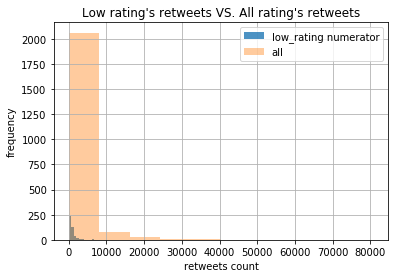

In [522]:
df_lowRate.retweet_count.hist(alpha = 0.8, label = 'low_rating numerator')
twitter_archive_master.retweet_count.hist(alpha = 0.4, label= 'all')
plt.xlabel('retweets count')
plt.ylabel('frequency')
plt.title('Low rating\'s retweets VS. All rating\'s retweets')
plt.savefig('123.png')
plt.legend();

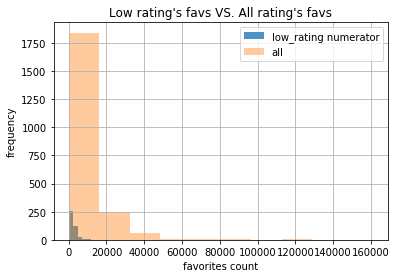

In [523]:
df_lowRate.favorite_count.hist(alpha = 0.8, label = 'low_rating numerator')
twitter_archive_master.favorite_count.hist(alpha = 0.4, label= 'all')
plt.xlabel('favorites count')
plt.ylabel('frequency')
plt.title('Low rating\'s favs VS. All rating\'s favs')

plt.legend();

 - As from the two histograms above, the favs and retweets of those low rating tweets are significanly lower than the other tweets.

### Insight  4 & Visualization 1
 - There is a positive coorelation between the favs count, and retweets count. Generally, a tweet with higher favs count, will also have a higher retweets count.

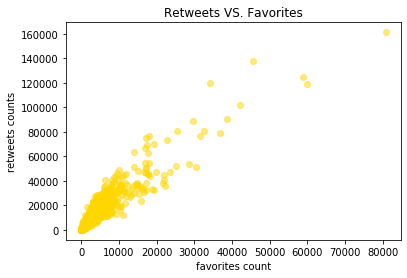

In [524]:
plt.scatter(x=twitter_archive_master.retweet_count, y=twitter_archive_master.favorite_count, c='gold',alpha=0.5)
plt.xlabel('favorites count')
plt.ylabel('retweets counts')
plt.title('Retweets VS. Favorites');